<a href="https://colab.research.google.com/github/fasmina-nasar/CalgaryPopulationPrediction/blob/main/Calgary_population_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree with Python & Scikit Learn

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.
I have used Calgary population contents dataset for this project which is retrieved through API.I implemented Decision Tree to predict the population of Calgary in coming years based on some features in the dataset.
 

 # Table of Contents

 1. Introduction to Machine Learning
 2. Glimpses of Decision Tree
 3. The problem Statement
 4. Dataset Description
 5. Import Dependencies
 6. Retrieve the Dataset
 7. Exploratory Data Analysis
 8. Visualization of Data
 9. Preprocessing Dataset
 10. Declare features & Target Variable
 11. Compile Decision Tree Model
 12. Prediction & Accuracy of the Model
 13. Checking Mean Squared error
 14.  Results & Conclusion

## 1. Introduction to Machine Learning

 Machine Learning Algorithms can be broadly classified into 3 - Supervised,Unsupervised and Reinforcement learning.There is other category named Semi supervised also, But the most commonly used Algorithms are the above mentioned 3 ones. Presence of target variable is the difference between supervised and unsupervised learning. In supervised learning, There will be a target varibale but in the case of unsupervised learning target variable, wont be there. These Algorithms can be applied to both Classification and Regression datasets . Reinforcement learning is a method based on rewarding desired behaviors and/or punishing undesired ones. Semi-supervised learning is a combination of supervised and unsupervised machine learning methods. It is an approach to machine learning that combines a small amount of labelled  data with a large amount of unlabeled data during training.

## 2. Glimpses of Decision Tree Algorithm

Decision tree is Supervised Machine Learning Algorithm builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. Decision Tree Regressor contains parameters such as criterion , splitter , max_depth, min_samples_split,min_samples_leaf,min_weight_fraction_leaf,max_leaf_nodes,randoom_state etc which has its own purpose in building the model.

## 3. The problem Statement


I have used Calgary population contents dataset for this project which is retrieved through API.I implemented Decision Tree to predict the population of Calgary in coming years based on features such as ref_date,geo and components_of_population in the dataset.

## 4. Dataset Description

As an immigrant to Canada, I thought to do a project based on Canada's population, which ultimately led me to this Project. This is the Dataset which consists of population in calgary per year based on some of the features. I've got this Dataset from 'open data network' which could be retrieved only through API. This Dataset consists of 6 features/variables and an output column. Based on those 6 features corresponding value will be the population. ref_date represents the respective year, geo refers the location,age_group,components_of_population, components_of_population,sex and unit of measure(uom) are our variables and value is our target column. 


## 5. Import Dependencies

In [1]:

import requests
import pprint

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from math import sqrt
from sklearn.metrics import mean_squared_error

## 6. Retrieve the Dataset

Retrieve Data by utilizing Requests library and used pretty printer to print it into readable form. 

In [2]:
url='https://data.calgary.ca/resource/2upi-evrj.json'

In [3]:
response=requests.get(url)

In [4]:
payload=response.json()

In [5]:
print(payload)

[{'ref_date': '2001/2002', 'geo': 'All census metropolitan areas and census agglomerations, Canada', 'components_of_population': 'Births', 'sex': 'Both sexes', 'age_group': 'All ages', 'uom': 'Persons', 'value': '269327'}, {'ref_date': '2002/2003', 'geo': 'All census metropolitan areas and census agglomerations, Canada', 'components_of_population': 'Births', 'sex': 'Both sexes', 'age_group': 'All ages', 'uom': 'Persons', 'value': '271941'}, {'ref_date': '2003/2004', 'geo': 'All census metropolitan areas and census agglomerations, Canada', 'components_of_population': 'Births', 'sex': 'Both sexes', 'age_group': 'All ages', 'uom': 'Persons', 'value': '278531'}, {'ref_date': '2004/2005', 'geo': 'All census metropolitan areas and census agglomerations, Canada', 'components_of_population': 'Births', 'sex': 'Both sexes', 'age_group': 'All ages', 'uom': 'Persons', 'value': '280156'}, {'ref_date': '2005/2006', 'geo': 'All census metropolitan areas and census agglomerations, Canada', 'components

In [6]:
pp=pprint.PrettyPrinter(indent=1)
pp.pprint(payload)

Streaming output truncated to the last 5000 lines.
  'value': '153031'},
 {'age_group': 'All ages',
  'components_of_population': 'Net non-permanent residents',
  'geo': 'All census metropolitan areas, Canada',
  'ref_date': '2019/2020',
  'sex': 'Both sexes',
  'uom': 'Persons',
  'value': '74997'},
 {'age_group': 'All ages',
  'components_of_population': 'Net non-permanent residents',
  'geo': 'All census metropolitan areas, Canada',
  'ref_date': '2020/2021',
  'sex': 'Both sexes',
  'uom': 'Persons',
  'value': '-47344'},
 {'age_group': 'All ages',
  'components_of_population': 'Residual deviation',
  'geo': 'All census metropolitan areas, Canada',
  'ref_date': '2001/2002',
  'sex': 'Both sexes',
  'uom': 'Persons',
  'value': '-7418'},
 {'age_group': 'All ages',
  'components_of_population': 'Residual deviation',
  'geo': 'All census metropolitan areas, Canada',
  'ref_date': '2002/2003',
  'sex': 'Both sexes',
  'uom': 'Persons',
  'value': '-7878'},
 {'age_group': 'All ages',
 

#### Converting Lists of JSON objects into a Dataframe

In [7]:
data=pd.DataFrame(payload,columns=['age_group','components_of_population','geo','ref_date','sex','uom','value'])
data

,age_group,components_of_population,geo,ref_date,sex,uom,value
0,All ages,Births,All census metropolitan areas and census agglo...,2001/2002,Both sexes,Persons,269327
1,All ages,Births,All census metropolitan areas and census agglo...,2002/2003,Both sexes,Persons,271941
2,All ages,Births,All census metropolitan areas and census agglo...,2003/2004,Both sexes,Persons,278531
3,All ages,Births,All census metropolitan areas and census agglo...,2004/2005,Both sexes,Persons,280156
4,All ages,Births,All census metropolitan areas and census agglo...,2005/2006,Both sexes,Persons,285847
...,...,...,...,...,...,...,...
995,All ages,Births,"Saint John (CMA), New Brunswick",2020/2021,Both sexes,Persons,1166
996,All ages,Deaths,"Saint John (CMA), New Brunswick",2001/2002,Both sexes,Persons,1118
997,All ages,Deaths,"Saint John (CMA), New Brunswick",2002/2003,Both sexes,Persons,1128
998,All ages,Deaths,"Saint John (CMA), New Brunswick",2003/2004,Both sexes,Persons,1184


## 7.Exploratory Data Analysis

Check the shape of dataset

In [8]:
data.shape

(1000, 7)

View summary of dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age_group                 1000 non-null   object
 1   components_of_population  1000 non-null   object
 2   geo                       1000 non-null   object
 3   ref_date                  1000 non-null   object
 4   sex                       1000 non-null   object
 5   uom                       1000 non-null   object
 6   value                     1000 non-null   object
dtypes: object(7)
memory usage: 54.8+ KB


Checking for any Missing Values

In [10]:
data.isnull().sum()

age_group                   0
components_of_population    0
geo                         0
ref_date                    0
sex                         0
uom                         0
value                       0
dtype: int64

Statistical summary of dataset

In [11]:
data.describe()

,age_group,components_of_population,geo,ref_date,sex,uom,value
count,1000,1000,1000,1000,1000,1000,1000
unique,1,10,7,20,1,1,890
top,All ages,Births,All census metropolitan areas and census agglo...,2001/2002,Both sexes,Persons,114
freq,1000,121,195,52,1000,1000,5


Checking Unique values in each column by iterating column in the dataset

In [12]:
for i in data.columns:
  print(f'unique values of {i} are : {data[i].unique()}')

unique values of age_group are : ['All ages']
unique values of components_of_population are : ['Births' 'Deaths' 'Immigrants' 'Emigrants' 'Returning emigrants'
 'Net temporary emigration' 'Net interprovincial migration'
 'Net intraprovincial migration' 'Net non-permanent residents'
 'Residual deviation']
unique values of geo are : ['All census metropolitan areas and census agglomerations, Canada'
 'All census metropolitan areas, Canada'
 "St. John's (CMA), Newfoundland and Labrador"
 'Halifax (CMA), Nova Scotia' 'Moncton (CMA), New Brunswick'
 'Saint John (CMA), New Brunswick' 'Saguenay (CMA), Quebec']
unique values of ref_date are : ['2001/2002' '2002/2003' '2003/2004' '2004/2005' '2005/2006' '2006/2007'
 '2007/2008' '2008/2009' '2009/2010' '2010/2011' '2011/2012' '2012/2013'
 '2013/2014' '2014/2015' '2015/2016' '2016/2017' '2017/2018' '2018/2019'
 '2019/2020' '2020/2021']
unique values of sex are : ['Both sexes']
unique values of uom are : ['Persons']
unique values of value are : ['2

Exploring the columns which contain more than one unique value

In [13]:
# view the labels in the variable

data['components_of_population'].unique()

array(['Births', 'Deaths', 'Immigrants', 'Emigrants',
       'Returning emigrants', 'Net temporary emigration',
       'Net interprovincial migration', 'Net intraprovincial migration',
       'Net non-permanent residents', 'Residual deviation'], dtype=object)

In [14]:
# view how many different types of variables are there

len(data['components_of_population'].unique())

10

In [15]:
# view the labels in the variable

data['ref_date'].unique()

array(['2001/2002', '2002/2003', '2003/2004', '2004/2005', '2005/2006',
       '2006/2007', '2007/2008', '2008/2009', '2009/2010', '2010/2011',
       '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016',
       '2016/2017', '2017/2018', '2018/2019', '2019/2020', '2020/2021'],
      dtype=object)

In [16]:
# view how many different types of variables are there

len(data['ref_date'].unique())

20

In [17]:
# view the labels in the variable

data['geo'].unique()

array(['All census metropolitan areas and census agglomerations, Canada',
       'All census metropolitan areas, Canada',
       "St. John's (CMA), Newfoundland and Labrador",
       'Halifax (CMA), Nova Scotia', 'Moncton (CMA), New Brunswick',
       'Saint John (CMA), New Brunswick', 'Saguenay (CMA), Quebec'],
      dtype=object)

In [18]:
# view how many different types of variables are there

len(data['geo'].unique())

7

In [19]:
data['value'].unique()

array(['269327', '271941', '278531', '280156', '285847', '297920',
       '308370', '313391', '313692', '312242', '314724', '317000',
       '317462', '318609', '319701', '316091', '313726', '310393',
       '309170', '299668', '173597', '176372', '179974', '180742',
       '176313', '182854', '184901', '186362', '186456', '193010',
       '190722', '198125', '199684', '209673', '206944', '217538',
       '225623', '224931', '237787', '244856', '250052', '193712',
       '231910', '237111', '250056', '233314', '243754', '238865',
       '262890', '252238', '251887', '255074', '257588', '231488',
       '310249', '261724', '293019', '303223', '273841', '219178',
       '44288', '49415', '53251', '52882', '56571', '61515', '61763',
       '56979', '53819', '56978', '60251', '57741', '59707', '61384',
       '63325', '54631', '46914', '44129', '34353', '27620', '23162',
       '26115', '27558', '28746', '31917', '36273', '30645', '29248',
       '31719', '34211', '34455', '34274', '34251'

In [20]:
len(data['value'].unique())

890

Drop Redundant features

As features such as age_group,sex and uom only contains single value we can drop those.

In [21]:
data=data.drop(['age_group','sex','uom'],axis=1)

## 8. Visualization of Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


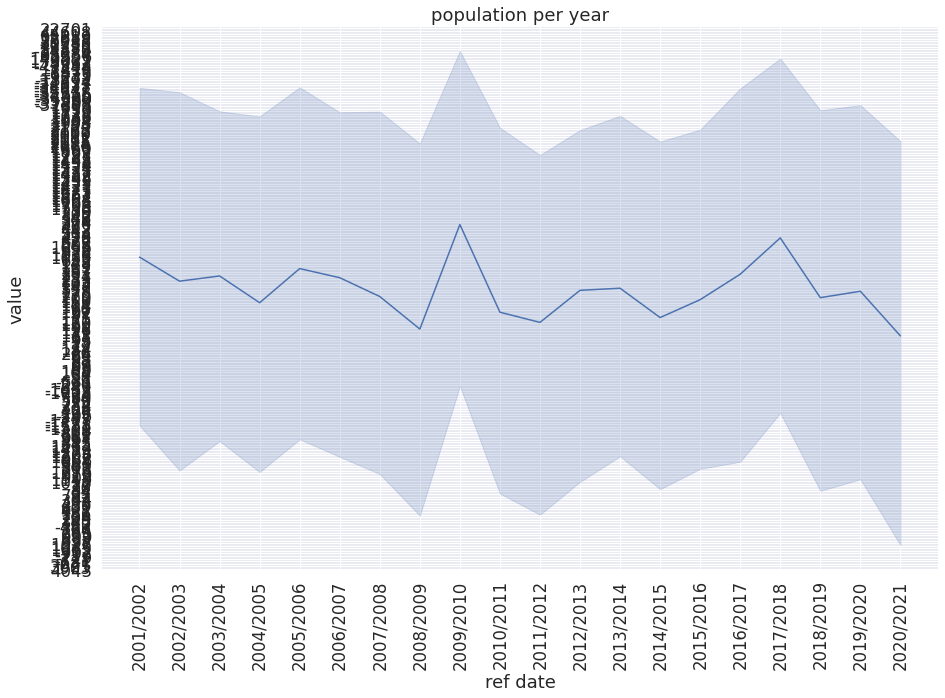

In [22]:
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize']=[15,10]

figure=sns.lineplot(data['ref_date'],data['value'])
figure.set_title('population per year')
figure.set_ylabel('value')
figure.set_xlabel('ref date')
figure.set_xticklabels(data['ref_date'],rotation=90)


plt.show()

From this graph, it is clear that the population in the year 2009/2010 is comparatively higher than comes 2017/2018 with a minute difference. Towards 2021, the population count is going down. Rest all years are almost similar in conditions.

## 9. Preprocessing Dataset

Initially, apply Label encoder to convert categorical variables into integers.All values are dispersed so to normalize it apply Min Max scaler.

In [23]:
lb=LabelEncoder()

data['ref_date']=lb.fit_transform(data['ref_date'])
data['components_of_population']=lb.fit_transform(data['components_of_population'])
data['geo']=lb.fit_transform(data['geo'])

In [24]:
scaler=MinMaxScaler()

data['ref_date']=scaler.fit_transform(data[['ref_date']])
data['components_of_population']=scaler.fit_transform(data[['components_of_population']])
data['geo']=scaler.fit_transform(data[['geo']])
data['value']=scaler.fit_transform(data[['value']])

Preview the resultant dataset

In [25]:
data

,components_of_population,geo,ref_date,value
0,0.000000,0.000000,0.000000,0.867364
1,0.000000,0.000000,0.052632,0.874247
2,0.000000,0.000000,0.105263,0.891599
3,0.000000,0.000000,0.157895,0.895877
4,0.000000,0.000000,0.210526,0.910862
...,...,...,...,...
995,0.000000,0.833333,1.000000,0.161291
996,0.111111,0.833333,0.000000,0.161165
997,0.111111,0.833333,0.052632,0.161191
998,0.111111,0.833333,0.105263,0.161338


## 10. Declare features & Target Variable

Split the dataset into features and target as x & Y followed by splitting them into training and testing part 75:25 ratio.

In [26]:
x=data.drop(['value'],axis=1)
Y=data['value']

In [27]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.25,random_state=10)

## 11. Compile Decision Tree Model

Build the Decision tree model with some parameters such as criterion provided as 'absolute_error',splitter as 'best' (to choose the best split),max_depth as None(default value so that nodes are expanded until all leaves are pure),random_state which controls the randomness of the estimator and max_features(The number of features to consider when looking for the best split) is provided as 'auto',rest of the features are not provided which would be taking its default value.

In [28]:
model=tree.DecisionTreeRegressor(criterion='absolute_error',splitter='best',max_depth=None,random_state=30,max_features='auto',)
model.fit(x_train,Y_train)

DecisionTreeRegressor(criterion='absolute_error', max_features='auto',
                      random_state=30)

## 12.Prediction & Accuracy of the Model 

In [29]:
score=model.score(x_test,Y_test)
print('Accuracy of the model is : ',round(score*100,2),'%')

Accuracy of the model is :  97.88 %


We Achieved the accuracy of the model as 97%

Prediction

In [30]:
Y_pred=model.predict(x_test)
Y_pred

array([0.15852098, 0.15847095, 0.1603325 , 0.12064762, 0.15926876,
       0.15847095, 0.16205449, 0.6353504 , 0.98689546, 0.16205449,
       0.15984539, 0.16196234, 0.08260311, 0.16031933, 0.16279174,
       0.16196497, 0.15839986, 0.16130935, 0.15382104, 0.35568943,
       0.16186492, 0.22731653, 0.15245713, 0.53247567, 0.1628207 ,
       0.9904948 , 0.56687081, 0.16069322, 0.26684606, 0.15791539,
       0.06634421, 0.16102498, 0.15750727, 0.16514039, 0.16196497,
       0.15676212, 0.15245713, 0.16159635, 0.16378702, 0.15829191,
       0.16891878, 0.16080644, 0.15951889, 0.15632241, 0.16052734,
       0.15829981, 0.1617201 , 0.15849465, 0.1614015 , 0.15884747,
       0.64506888, 0.29746019, 0.21939377, 0.15986119, 0.24274603,
       0.1630761 , 0.15862367, 0.15944517, 0.16853699, 0.63411815,
       0.16055894, 0.15829981, 0.16153315, 0.15934775, 0.15883694,
       0.15934775, 0.15355774, 0.1583867 , 0.16066426, 0.16196497,
       0.06609144, 0.13747788, 0.15856574, 0.08260311, 0.16174

Convert actual value and predicted value into a dataframe

In [31]:
error=pd.DataFrame({'Actual Value':np.array(Y_test),'Predicted Value':np.array(Y_pred)})
error.head(10)

,Actual Value,Predicted Value
0,0.158413,0.158521
1,0.158571,0.158471
2,0.160314,0.160332
3,0.120906,0.120648
4,0.162550,0.159269
5,0.158542,0.158471
6,0.165180,0.162054
7,0.617480,0.635350
8,0.992888,0.986895
9,0.172834,0.162054


## 13.Checking Mean Squared error

The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.Root mean squared error is the square root of mean squared error.

In [32]:
mse=mean_squared_error(Y_pred,Y_test)
rmse=sqrt(mse)
print('Mean squared error : ',mse)
print('Root Mean squared error : ',rmse)

Mean squared error :  0.0009518577347752095
Root Mean squared error :  0.030852191733736024


## 14. Results & Conclusion

1. In this project I have implimented the most popular supervised Machine Learning Algorithm Decision Tree.
2. Retrieved Data using Requests library.
3. seaborn is utilized for visualization of the dataset.
4. Applied some preprocessing to the dataset.
5. Built Model and made predictions.
6. 97% of accuracy is achieved.